<a href="https://colab.research.google.com/github/X-Jin/Public/blob/main/Jin_2025_monolayer_WSe2_5to10_THz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Optical property extraction of monolayer WSe2 from 5 to 10 THz
#
# Relevant article:
# "Enhanced Terahertz Spectroscopy of a Monolayer Transition Metal Dichalcogenide"
#  Advanced Functional Materials. 2025, 35, 2419841
# https://doi.org/10.1002/adfm.202419841
# Authors: Xin Jin, Vincenzo Aglieri, Young-Gyun Jeong, Atiye Pezeshki, Lilian Skokan,
# Mostafa Shagar, Yuechen Jia, Pablo Bianucci, Andreas Ruediger, Emanuele Orgiu,
# Andrea Toma, and Luca Razzari*
#
# This script is created by Xin Jin,
# https://orcid.org/0000-0001-5858-6217
# in Genova, Italia, 2025-07-03
#
# Copyright: Free to use under CC BY 4.0

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ν0 = 7.47e12    # [Hz], Resonance frequency
l = 0.65e-9     # [m], Thickness of Monolayer
ε0 = 1          # [1], Background permittivity in air
ug = 610        # [m/s], Group velocity
τ = 5.56e-12    # [s], Phonon lifetime

In [ ]:
def perm(ν):
    ε = 1 + 1/l*4*ε0*ν0*ug/(ν0**2 - ν**2 - 1j*ν/τ);
    return ε

In [ ]:
ν_min = 5e12    # [Hz]
ν_max = 10e12   # [Hz]
npoints = 1000
ν = np.linspace(ν_min, ν_max, npoints)
c = 299792458   # [m/s], Speed of light in vacuum
λ = c/ν*1e6     # [μm], Wavelength
ε = perm(ν)
n = (ε**.5).real
k = (ε**.5).imag

In [ ]:
#============================   DATA OUTPUT   =================================
file = open('mono_WSe2_um.txt', 'w')
for i in range(npoints-1, -1, -1):
    file.write('\n        {:.4e} {:.4e} {:.4e}'.format(λ[i],n[i],k[i]))
file.close()

file = open('mono_WSe2_Hz.txt', 'w')
for i in range(npoints):
    file.write('\n        {:.4e} {:.4e} {:.4e}'.format(ν[i],n[i],k[i]))
file.close()

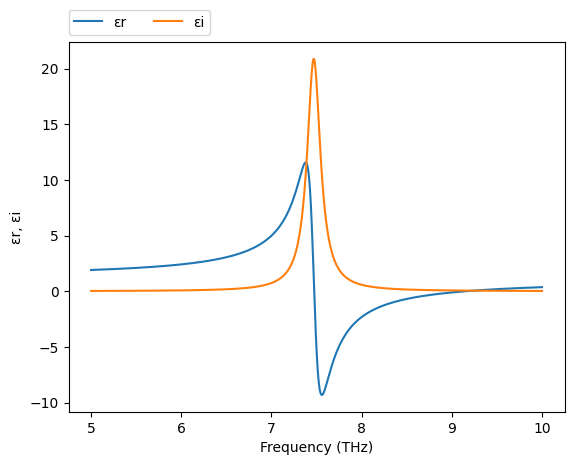

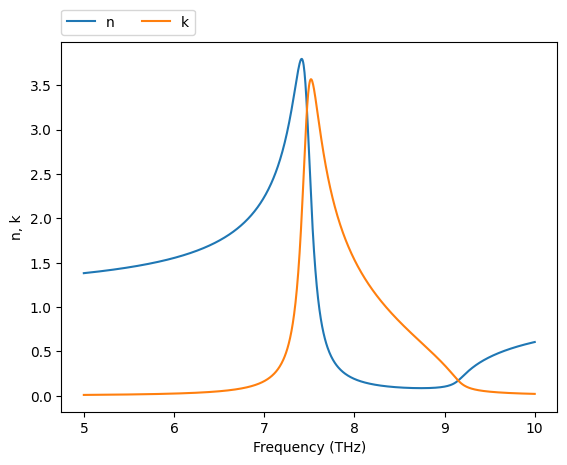

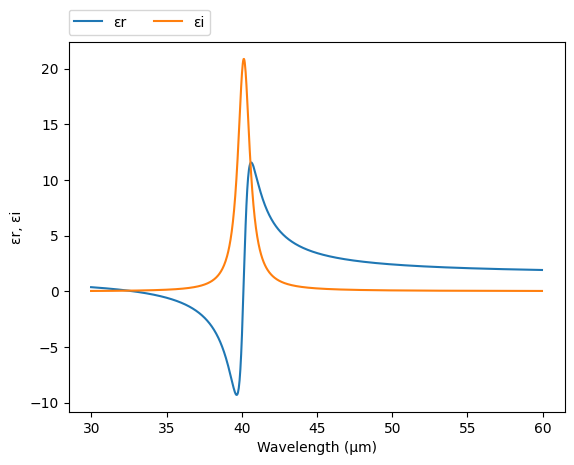

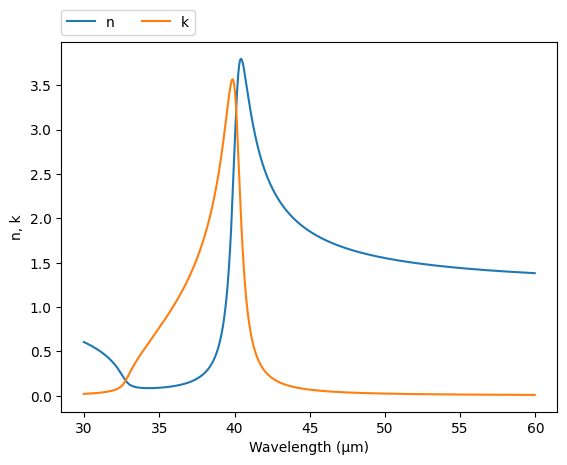

In [ ]:
#===============================   PLOT   =====================================

#plot εr,εi vs THz
plt.figure(1)
plt.plot(ν/1e12, ε.real, label="εr")
plt.plot(ν/1e12, ε.imag, label="εi")
plt.xlabel('Frequency (THz)')
plt.ylabel('εr, εi')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)

#plot n,k vs THz
plt.figure(2)
plt.plot(ν/1e12, n, label="n")
plt.plot(ν/1e12, k, label="k")
plt.xlabel('Frequency (THz)')
plt.ylabel('n, k')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)

#plot εr,εi vs μm
plt.figure(3)
plt.plot(λ, ε.real, label="εr")
plt.plot(λ, ε.imag, label="εi")
plt.xlabel('Wavelength (μm)')
plt.ylabel('εr, εi')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)

#plot n,k vs μm
plt.figure(4)
plt.plot(λ, n, label="n")
plt.plot(λ, k, label="k")
plt.xlabel('Wavelength (μm)')
plt.ylabel('n, k')
plt.legend(bbox_to_anchor=(0,1.02,1,0),loc=3,ncol=2,borderaxespad=0)